In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


np.random.seed(5)

In [ ]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
print(data.info())
print('-'*30)
print(data.columns)
print('-'*30)
print(data.head())
print('-'*30)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
------------------------------
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlor

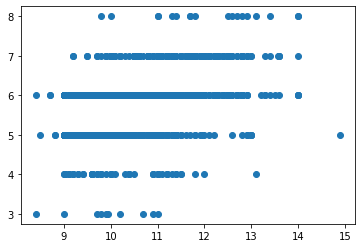

In [ ]:
alco_qual = data[['alcohol', 'quality']]
alco, qual = data.alcohol, data.quality

plt.scatter(alco, qual)

In [ ]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [ ]:
km = KMeans(init="random", n_clusters=3)
km.fit(data)

KMeans(init='random', n_clusters=3)

In [ ]:
km.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[-0.0668396 ,  0.04648853,  0.10068874,  0.35844956, -0.00479112,
         1.01280769,  1.26094486,  0.29574281, -0.169688  , -0.19052902,
        -0.55265418, -0.44514462],
       [-0.64860826,  0.50189147, -0.78555152, -0.22885489, -0.17194877,
        -0.26118149, -0.37447781, -0.43003806,  0.62245448, -0.31782671,
         0.03523017, -0.15696874],
       [ 0.94804738, -0.72952295,  1.00677697,  0.03703645,  0.24126461,
        -0.42782681, -0.4645302 ,  0.36378248, -0.72774428,  0.5874097 ,
         0.3816598 ,  0.56345481]])

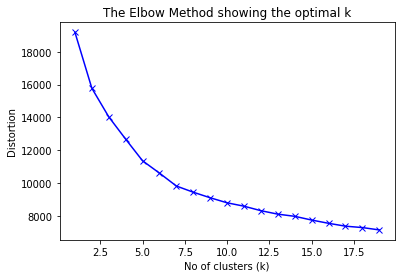

In [ ]:
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<ipython-input-223-2aa08b5c6aa5>:14: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-223-2aa08b5c6aa5>:14: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-223-2aa08b5c6aa5>:14: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this

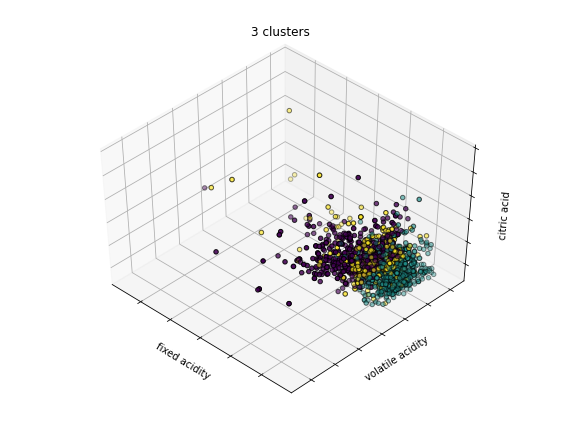

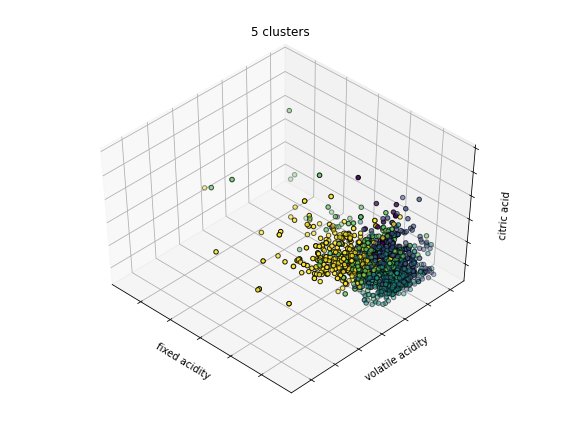

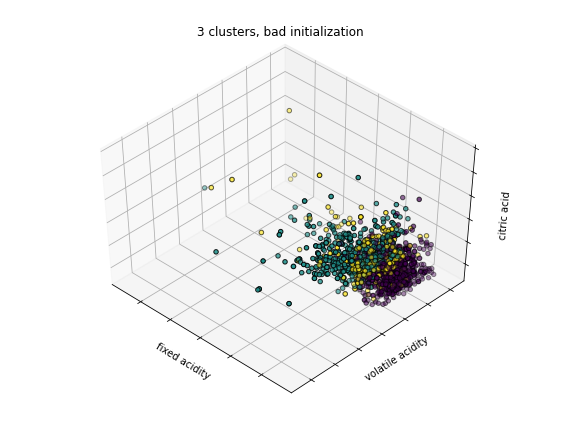

In [ ]:
estimators = [('k_means_3', KMeans(n_clusters=3, init='k-means++')),
              ('k_means_5', KMeans(n_clusters=5, init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

fignum = 1
titles = ['3 clusters', '5 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(data)
    labels = est.labels_

    ax.scatter(data.values[:, 3], data.values[:, 0], data.values[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('fixed acidity')
    ax.set_ylabel('volatile acidity')
    ax.set_zlabel('citric acid')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

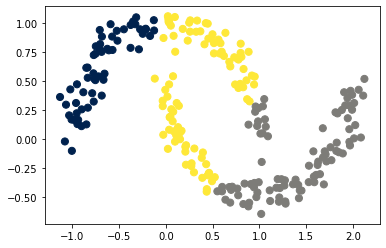

In [ ]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(250, noise=.075, random_state=22)

labels = KMeans(3, random_state=0).fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')

In [ ]:
labels = km.labels_
def purity_score(alco, qual):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(alco, qual)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(alco, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 8.88%


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
KMean= KMeans(n_clusters=3)
KMean.fit(X)
label=KMean.predict(X)
print(f'Silhouette Score(n=3): {silhouette_score(X, label)}')

Silhouette Score(n=3): 0.35485163077372545


DBSCAN

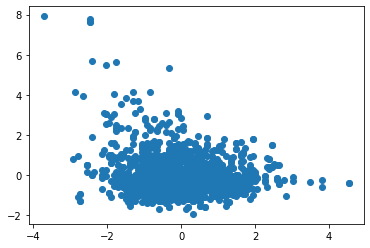

In [ ]:
ph_sul = data[['pH', 'sulphates']]
ph, sul = data.pH, data.sulphates

plt.scatter(ph, sul)

In [ ]:
from sklearn.cluster import DBSCAN

X = ph_sul.to_numpy()

dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [ ]:
data['cluster'] = dbscan_cluster_model.labels_

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823,0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848,-1
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848,0
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823,-1


In [ ]:
data['cluster'].value_counts()

 0    1248
-1     351
Name: cluster, dtype: int64

In [ ]:
import plotly.express as px

fig = px.scatter(x=ph, y=sul, color=data['cluster'])

fig.show()

In [ ]:
from sklearn.metrics import silhouette_score as ss

ss(X, data['cluster'])

0.3666523393239711

In [ ]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [ ]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [ ]:
N = len(combinations)
N

90

In [ ]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 387 clusters. Moving on
Index: 1, Score: -0.5856056653278905, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 14
Combination (0.01, 8) on iteration 3 of 90 has 1 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 177 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 58 clusters. Moving on
Index: 8, Score: -0.34836537841195653, Labels: [13 29 24 ... 25 -1 -1], NumClusters: 30
Index: 9, Score: -0.38935524132323535, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 19
Index: 10, Score: -0.383852402307241, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 7
Index: 11, Score: -0.3506434575203686, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 2
Combination (0.15142857142857144, 2) on ite

In [ ]:
best_dict

{'best_epsilon': 0.8585714285714285,
 'best_min_samples': 2,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.7165865275297657}

In [ ]:
data['cluster'] = best_dict['best_labels']

data['cluster'].value_counts()

 0    1591
 1       3
 2       3
-1       2
Name: cluster, dtype: int64

In [ ]:
fig = px.scatter(x=ph, y=sul, color=data['cluster'])
fig.show()

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(ph, sul)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, DBSCAN)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 14.32%


hierarchical cluster

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import numpy as np
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

In [ ]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data=data.iloc[:,3:5].values

In [ ]:
data

array([[1.9  , 0.076],
       [2.6  , 0.098],
       [2.3  , 0.092],
       ...,
       [2.3  , 0.076],
       [2.   , 0.075],
       [3.6  , 0.067]])

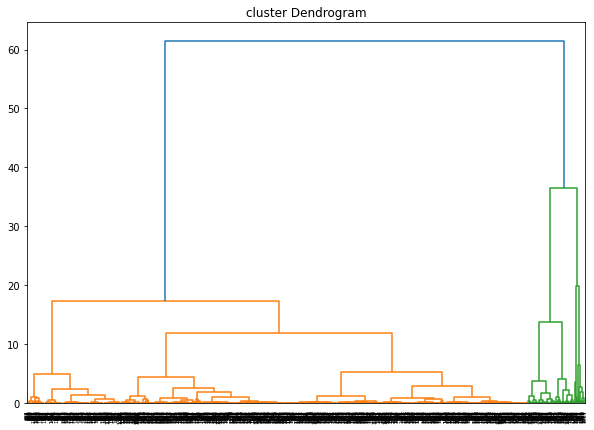

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("cluster Dendrogram")
dend=shc.dendrogram(shc.linkage(data,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 2])

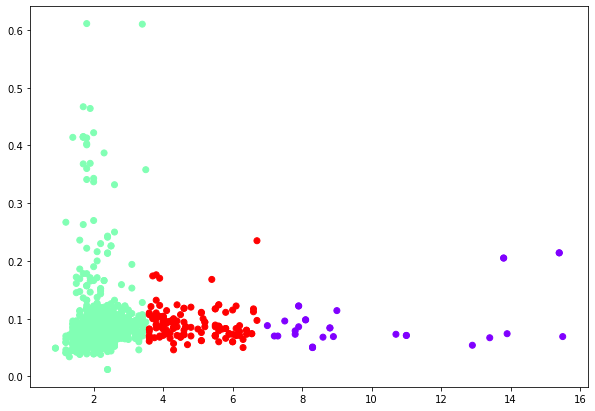

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1], c=cluster.labels_,cmap='rainbow')

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 42.59%


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(X, label)}')

Silhouette Score(n=3): 0.35485163077372545
